Практика №8

Загрузка библиотек:

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Задание 3

Загрузка данных из CSV файла: 

In [58]:
data = pd.read_csv('bitcoin.csv')
data['time'] = pd.to_datetime(data['time'], format="%Y-%m-%d")
data.tail(5)

,Unnamed: 0,time,high,low,open,volumefrom,volumeto,close
1996,1996,2021-06-07,36790.39,33367.12,35798.57,52209.55,1.850311e+09,33582.86
1997,1997,2021-06-08,34061.09,31034.35,33582.86,88483.79,2.890313e+09,33409.38
1998,1998,2021-06-09,37528.42,32435.18,33409.38,92280.57,3.249554e+09,37391.58
1999,1999,2021-06-10,38387.20,35821.05,37391.58,63052.49,2.338112e+09,36680.78
2000,2000,2021-06-11,37665.85,35981.84,36680.78,33418.02,1.235391e+09,36843.33


Задание 4

Удаление данных за последние 14 дней: 

In [59]:
data_dropped = data.iloc[:-14]
data_dropped.tail(5)

,Unnamed: 0,time,high,low,open,volumefrom,volumeto,close
1982,1982,2021-05-24,39945.35,34467.32,34716.84,106765.14,3.981461e+09,38837.76
1983,1983,2021-05-25,39842.90,36509.09,38837.76,66530.67,2.529569e+09,38387.36
1984,1984,2021-05-26,40854.81,37855.81,38387.36,66483.59,2.607760e+09,39295.08
1985,1985,2021-05-27,40408.95,37211.84,39295.08,46474.62,1.804037e+09,38538.84
1986,1986,2021-05-28,38879.60,34733.76,38538.84,85345.66,3.104364e+09,35680.92


Задание 5

Спрогнозировать данные на следующие 14 дней

In [60]:
regression = LinearRegression()

PredictData = data[:-14]
ReferenceData = data[-14:]

X = PredictData.drop(columns=['time', 'close'])
y = PredictData['close']
regression.fit(X, y);

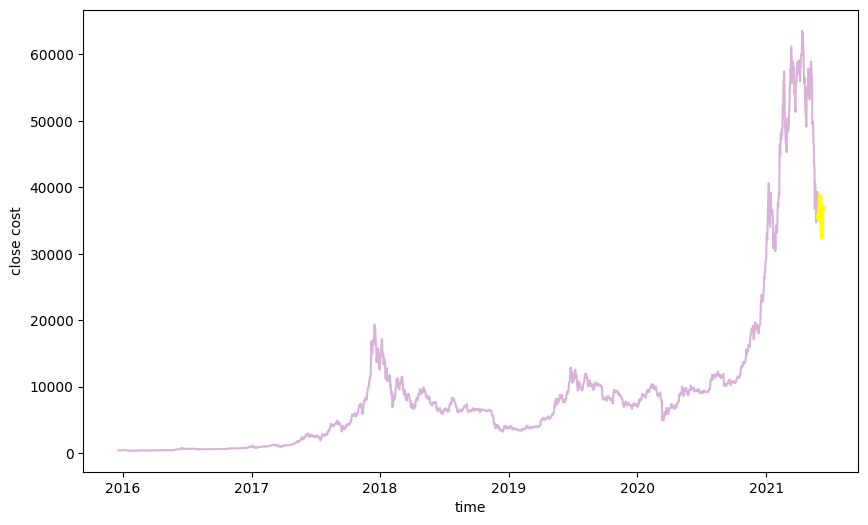

In [65]:
plt.figure(figsize=(10,6))
plt.plot(PredictData.time, y, alpha=0.3, color='purple')
X_test = ReferenceData.drop(columns=['time', 'close'])
y_pred = regression.predict(X_test)
plt.plot(ReferenceData.time, y_pred, color='yellow', linewidth=3)
plt.xlabel('time')
plt.ylabel('close cost');

Задание 6

Сравнить полученные данные с исходными

In [62]:
import sklearn.metrics as metr
metr.r2_score(ReferenceData.close, y_pred)

0.7575715470425642

Задание 7

Вывести угол наклона и y-перехват

In [70]:
print('угол наклона:', regression.coef_[0])
print('y-перехват:', regression.intercept_)

угол наклона: 0.005502096831314832
y-перехват: 35.65580663829496


Задание 8

Построение диаграммы рассеяния

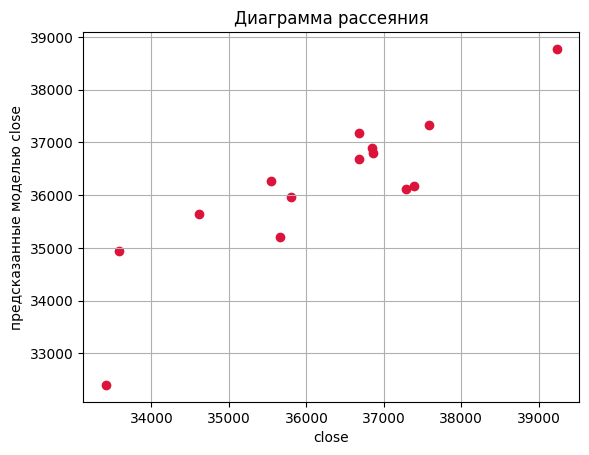

In [64]:
plt.grid()
plt.title('Диаграмма рассеяния')
plt.xlabel('close')
plt.ylabel('предсказанные моделью close')
plt.scatter(x=ReferenceData.close, y=y_pred, marker='o', color='crimson');